# Project 1- Test a Perceptual Phenomenon

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [21]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
from scipy import stats
import math
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
#data of different participants in stroop task
data = pd.read_csv('stroopdata.csv')
data['Difference'] = data['Incongruent'] - data['Congruent']
data['participant_no'] = data.index + 1
display(data)

,Congruent,Incongruent,Difference,participant_no
0,12.079,19.278,7.199,1
1,16.791,18.741,1.950,2
2,9.564,21.214,11.650,3
3,8.630,15.687,7.057,4
4,14.669,22.803,8.134,5
5,12.238,20.878,8.640,6
6,14.692,24.572,9.880,7
7,8.987,17.394,8.407,8
8,9.401,20.762,11.361,9
9,14.480,26.282,11.802,10


## 1. What is our independent variable? What is our dependent variable?

**Answer** 
Independent variable will be the list of words in both the test i.e congruent and incongruent.
Dependent variable is which is find as an outcome i.e time recorded for each condition.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer**
> Hypothesis for this task:

H0(null Hypothesis)=> u0(incongruent mean)-u0(congruent mean)<=0
>u0 stands for average population mean 
No difference in avg population response time to satisfy H0

HA(alternative Hypothesis)=> u0(incongruent mean)-u0(congruent mean)>0 
> Difference in (+)ve direction for avg response time in incongruent and congruent to satisfy HA according to stroop effect.

Here u0(population response time) is unknown so z-test is not possible
Since each person has to do both the tasks therefore these are dependent.
The dependent t-test compares the means of two related groups to determine whether there is a statistically significant difference between these means.
We can compare two means from 2 samples for pre-test period and post-test period, which is the most appropriate task for dependent sample t-Test.
Since it is evident from the above sample data given for 24 people that time taken in Incongruent task will be higher than congruent one due interference between different information.
Also above data is roughly normally distributed.
So one-tailed dependent t-test is most suitable from above implications.


## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

We can apply descriptive satistics to this sample dataset to find out the tendency and variability of the dataset.

>Central Tendency

Best measure for central tendency will be mean and median.
mean congruent = uc ;
mean incongruent = ui ;
median congruent = mc ;
median incongruent = mi ;
mean difference  = ud ;
median difference = md ;

In [8]:
#uc
print data['Congruent'].mean()

14.051125


In [9]:
#ui
print data['Incongruent'].mean()

22.0159166667


In [11]:
#ud
print data['Difference'].mean()

7.96479166667


In [12]:
#mc
print data['Congruent'].median()

14.3565


In [13]:
#mi
print data['Incongruent'].median()

21.0175


In [14]:
#md
print data['Difference'].median()

7.6665


Its central tendency is good as median is quite close mean in both the types Congruent and Incongruent as well as in their difference.

> Variability

Finding Standard deviation is best approach for visualising variability in the dataset.

In [15]:
#sc
print data['Congruent'].std()

3.55935795765


In [16]:
#si
print data['Incongruent'].std()

4.79705712247


In [17]:
#sd
print data['Difference'].std()

4.86482691036


Standard deviation (variability) is high in incongruent data compared to Congruent data.

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

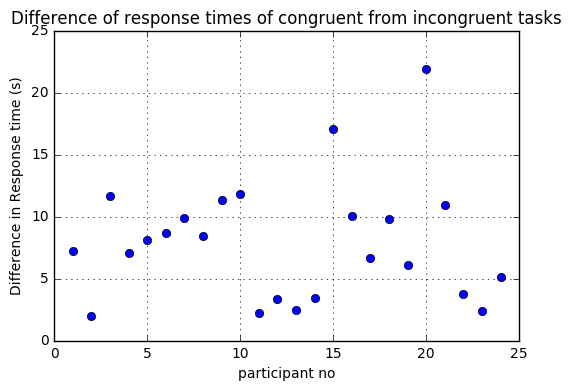

In [20]:
plt.plot(data['participant_no'], data['Difference'],'o')
plt.title('Difference of response times of congruent from incongruent tasks')
plt.xlabel('participant no')
plt.ylabel('Difference in Response time (s)')
plt.grid()

>The above graphs illustrates the difference in response time for the congruent and incongruent tasks, respectively. It can be easily observed that on average the incongruent tasks takes longer than congruent tasks around 7.96 sec on average.
Difference in response time for incongruent and congruent varies for each person and it is observed to have (+)ve value.

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We will do one-tailed dependent t-test with alpha=0.05 ,df=23

In [85]:
# Degrees of freedom
df = 23

# Alpha level criterion
alpha = 0.05

# Mean of differences
x = data["Difference"].mean()

# standard deviation of differences
s = data["Difference"].std()

# Standard Error
SE = s / math.sqrt(df+1)

# t statistic
t_stat = x / SE;
print t_stat


8.02070694411


In [86]:
# t critical values
t_crit = stats.t.ppf(1-alpha, df)
# used to find t- critical values 1-aplha = 0.95
print t_crit

1.71387152775


In [87]:
# p value
p = 1 - stats.t.cdf(t_stat, df);
print p

2.05150029187e-08


Since 1.714 < 8.021 => t-critical< t-stat.
p value is also very small which implies that confidence level is quite high i.e tending to 100%.

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Since in congruent words no distraction is there i.e colour is same as the text so its easy and fast to complete but incongruent words make human mind to process and differentiate, increasing response time.

For the same effect we can use different text sizes or type instead of colour like big, small, meduim or bold, italic or underline, also we can apply in mathematical polygons like square, rectangles, triangles etc.